# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

### 라이브러리 버전을 확인해 봅니다
----
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.5.0
1.19.5


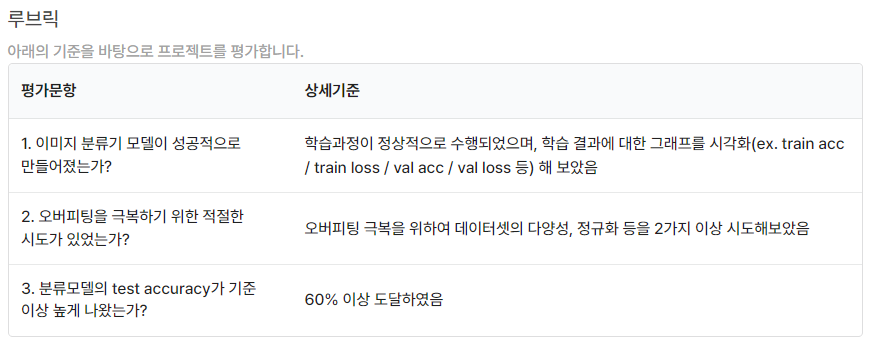

### 데이터를 준비하자
----
> 💡 호옥시라도 웹캠이 없다면?  
> 일단은 아래 내용을 쭉 읽고 숙지해주세요! 웹캠이 없는 경우 라는 토글에서 기다리고 있겠습니다. 물론 웹캠이 있다면 꼭 아래 내용을 따라해주세요 😉

🔶 데이터 만들기

(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?

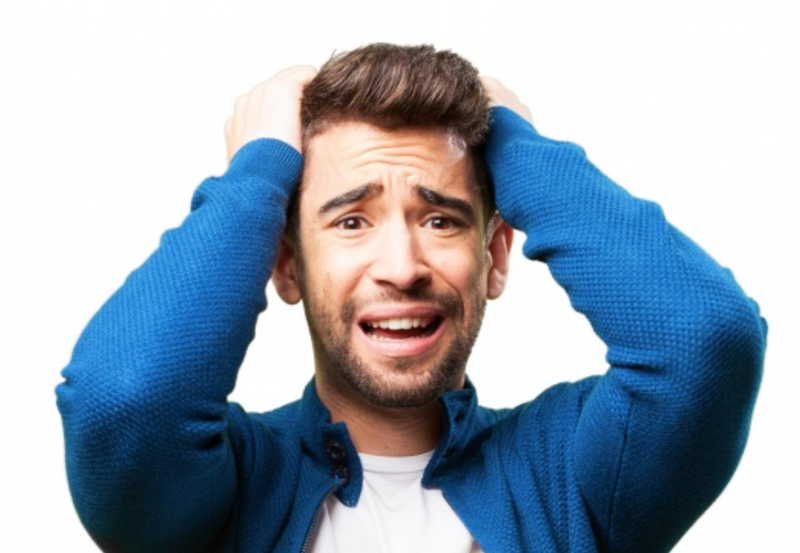

걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

☁️ 이미지 업로드 방법

1. 오른쪽 메뉴에서 Cloud Jupyter를 열어주세요.
2. rock.zip을 올리고 싶다면 rock_scissor_paper/rock 디렉토리로 이동 후, Upload버튼을 눌러주세요. 드래그 앤 드롭도 가능합니다.
3. 가위와 보 데이터셋에 대해서도 위 과정을 진행해주세요.  

여기까지 성공하셨다면 아래와 같은 구조를 갖고 있을 것입니다.

```bash
# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper
$ unzip paper.zip
```

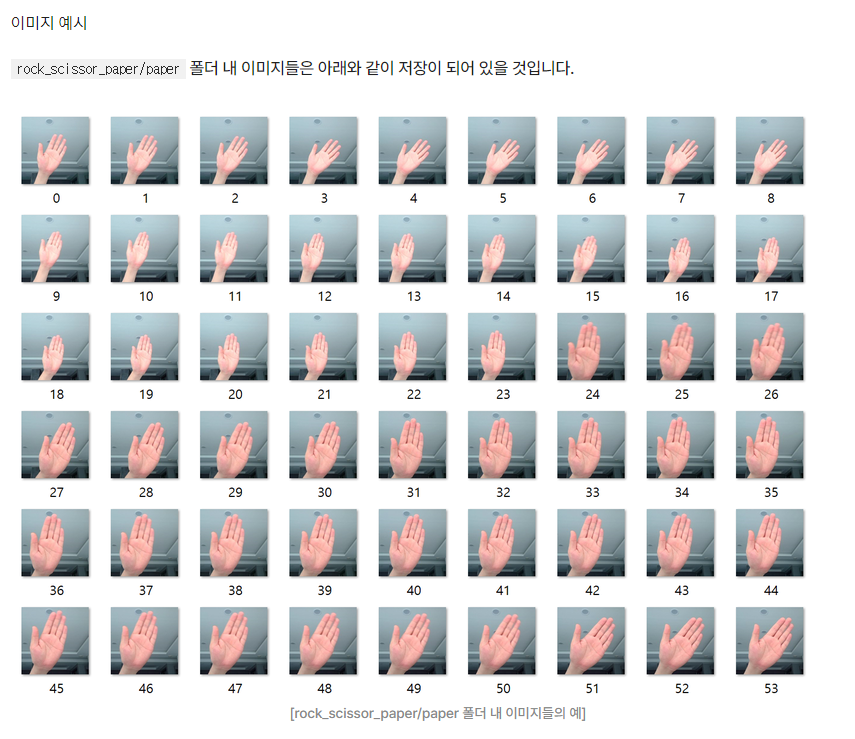

__Q8. 다운로드 받은 이미지는 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.__
> 224x224

### 데이터 불러오기 + Resize 하기

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '.\\rock_scissor_paper\\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2467  images to be resized.


C:\Users\aeoli\AppData\Local\Temp\ipykernel_13116\337088822.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


2467  images resized.
가위 이미지 resize 완료!


자 그러면, 바위 이미지도 28x28 로 만들어 볼까요? 아래 빈 칸에 코드를 작성하고, 실행해보세요. 바위 이미지가 모두 28x28로 바뀌어야 합니다.

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '.\\rock_scissor_paper\\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2504  images to be resized.


C:\Users\aeoli\AppData\Local\Temp\ipykernel_13116\337088822.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


2504  images resized.
바위 이미지 resize 완료!


In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '.\\rock_scissor_paper\\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2401  images to be resized.


C:\Users\aeoli\AppData\Local\Temp\ipykernel_13116\337088822.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


2401  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [6]:
import numpy as np

def load_data(img_path, number_of_data=7372):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = ".\\rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7372 입니다.
x_train shape: (7372, 28, 28, 3)
y_train shape: (7372,)


In [7]:
def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_dir_path = ".\\test"
(x_test, y_test)=load_test_data(test_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


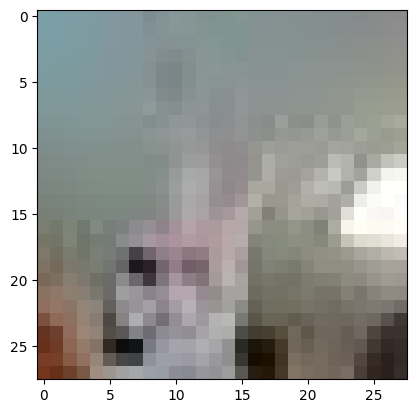

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[400])
print('라벨: ', y_train[400])

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [12]:
print(x_train.shape)

(7372, 28, 28, 3)


In [13]:
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [14]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (7372, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (7372, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
231/231 [==============================] - 32s 16ms/step - loss: 0.9968 - accuracy: 0.4866
Epoch 2/10
231/231 [==============================] - 3s 14ms/step - loss: 0.6631 - accuracy: 0.7292
Epoch 3/10
231/231 [==============================] - 3s 14ms/step - loss: 0.4597 - accuracy: 0.8158
Epoch 4/10
231/231 [==============================] - 3s 14ms/step - loss: 0.3596 - accuracy: 0.8576
Epoch 5/10
231/231 [==============================] - 3s 15ms/step - loss: 0.2651 - accuracy: 0.8969
Epoch 6/10
231/231 [==============================] - 3s 14ms/step - loss: 0.2162 - accuracy: 0.9223
Epoch 7/10
231/231 [==============================] - 3s 14ms/step - loss: 0.1713 - accuracy: 0.9376
Epoch 8/10
231/231 [==============================] - 3s 15ms/step - loss: 0.1315 - accuracy: 0.9525
Epoch 9/10
231/231 [==============================] - 3s 15ms/step - loss: 0.1087 - accuracy: 0.9609
Epoch 10/10
231/231 [==============================] - 3s 15ms/step - loss: 0.0895 - accur

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 4.6270 - accuracy: 0.3867
test_loss: 4.627032279968262
test_accuracy: 0.3866666555404663


In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='gelu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 196)       5488      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 196)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 392)       691880    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 392)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 196)               1920996   
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [23]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9867588e-01 1.3241463e-03 1.9819031e-12]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


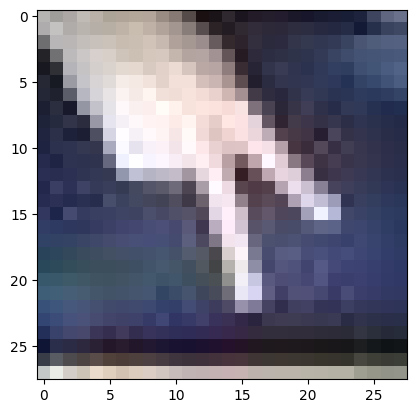

In [24]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.281415e-09 4.960803e-05 9.999504e-01]
라벨: 1, 예측결과: 2


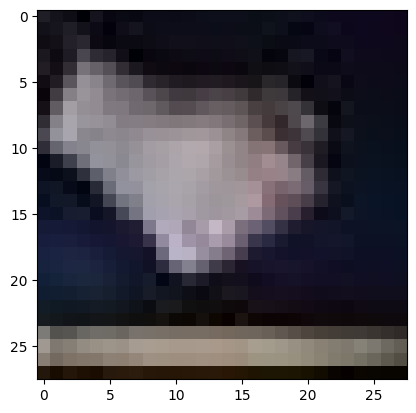

예측확률분포: [1.0000000e+00 1.3059586e-15 1.9258555e-12]
라벨: 1, 예측결과: 0


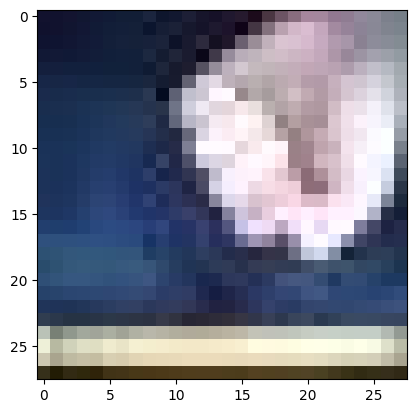

예측확률분포: [1.0260842e-07 3.5123955e-03 9.9648750e-01]
라벨: 1, 예측결과: 2


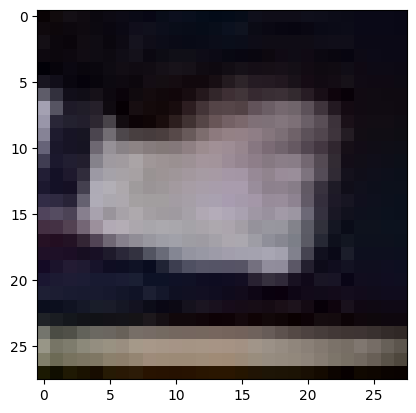

예측확률분포: [9.9999988e-01 5.2605173e-21 1.2918990e-07]
라벨: 2, 예측결과: 0


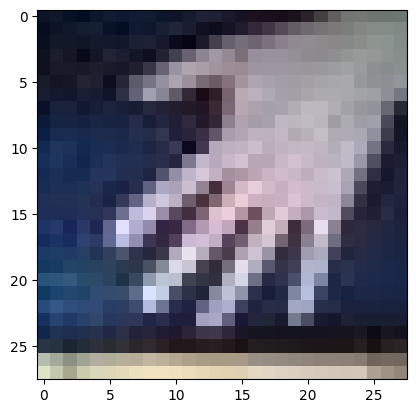

예측확률분포: [5.3359804e-06 2.5729365e-03 9.9742174e-01]
라벨: 1, 예측결과: 2


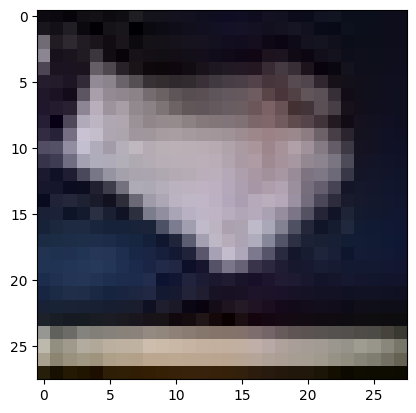

예측확률분포: [1.0000000e+00 1.8389960e-20 3.0177706e-16]
라벨: 1, 예측결과: 0


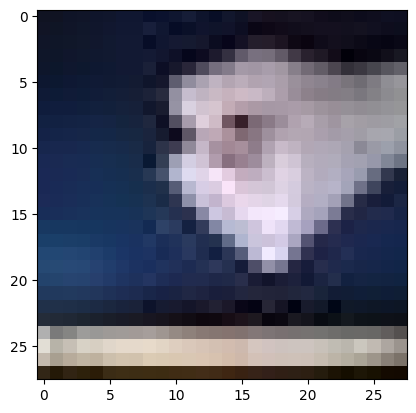

예측확률분포: [1.0000000e+00 7.3074485e-10 3.2092239e-11]
라벨: 1, 예측결과: 0


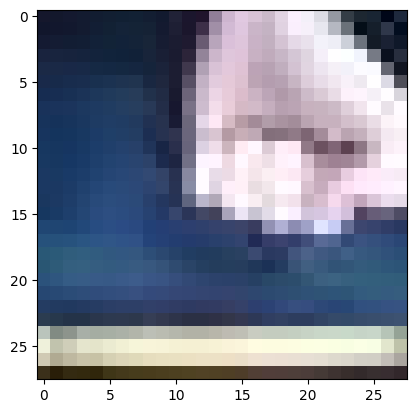

예측확률분포: [9.9999952e-01 4.5825634e-22 4.5992533e-07]
라벨: 1, 예측결과: 0


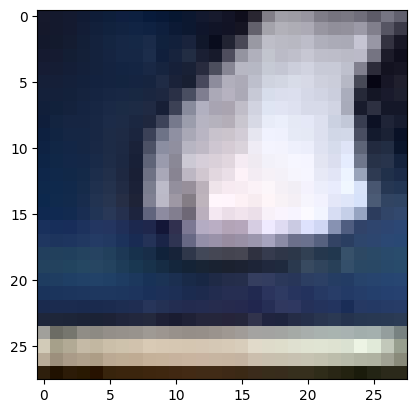

예측확률분포: [8.1487261e-09 1.8125087e-02 9.8187488e-01]
라벨: 1, 예측결과: 2


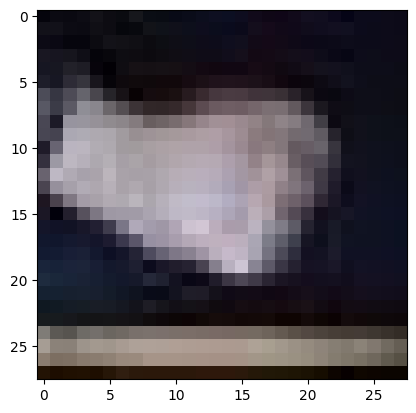

예측확률분포: [1.0000000e+00 1.5195784e-25 1.8174014e-16]
라벨: 1, 예측결과: 0


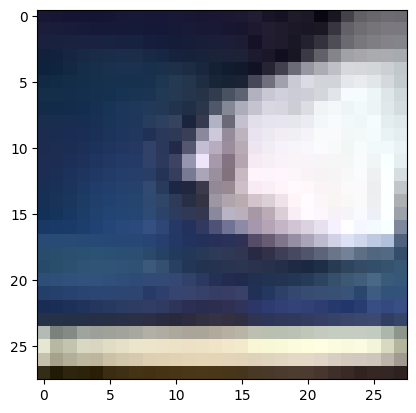

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 소결론
- 하이퍼파리미터를 일일이 조정해가며 테스트 해봤지만 정확도를 높이는데 한계가 있었다. 
- 현재까지는 데이터 수를 늘리는 것이 가장 효과가 좋았고, 신경망 layer에서 체널을 늘리는 것은 제한적이지만 효과가 있었음
- 마지막 분류 직전 layer에서 dence를 늘리는 것도 제한적이지만 효과가 있었음.
- 정확도 향상을 위한 작업 진행예정
    1. 이미지 제너레이터에서 데이터 어그멘테이션 시행 예정
    2. convolution레이어에서 한번에 탐색하는 필터의 크기를 키워서 테스트
    3. 각 테스트에서 실시간으로 오차를 추적하여 그래프로 작성

In [35]:
from keras.preprocessing.image import ImageDataGenerator

Epoch 1/25
231/231 [==============================] - 6s 18ms/step - loss: 1.0582 - accuracy: 0.4097 - val_loss: 1.4666 - val_accuracy: 0.2267
Epoch 2/25
231/231 [==============================] - 4s 16ms/step - loss: 0.8193 - accuracy: 0.6233 - val_loss: 0.7400 - val_accuracy: 0.6333
Epoch 3/25
231/231 [==============================] - 4s 17ms/step - loss: 0.5798 - accuracy: 0.7590 - val_loss: 0.2774 - val_accuracy: 0.8967
Epoch 4/25
231/231 [==============================] - 4s 16ms/step - loss: 0.4388 - accuracy: 0.8200 - val_loss: 0.3937 - val_accuracy: 0.8600
Epoch 5/25
231/231 [==============================] - 4s 16ms/step - loss: 0.3185 - accuracy: 0.8684 - val_loss: 0.5699 - val_accuracy: 0.8267
Epoch 6/25
231/231 [==============================] - 4s 16ms/step - loss: 0.2591 - accuracy: 0.8972 - val_loss: 0.7661 - val_accuracy: 0.7867
Epoch 7/25
231/231 [==============================] - 4s 17ms/step - loss: 0.2209 - accuracy: 0.9114 - val_loss: 0.4641 - val_accuracy: 0.8400

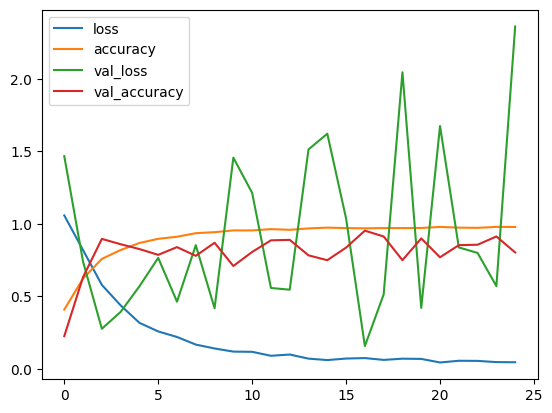

In [43]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25


model_exper_1st=keras.models.Sequential()
model_exper_1st.add(keras.layers.experimental.preprocessing.RandomFlip("vertical"))
model_exper_1st.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model_exper_1st.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_exper_1st.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model_exper_1st.add(keras.layers.MaxPool2D(2,2))
model_exper_1st.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_exper_1st.add(keras.layers.MaxPooling2D((2,2)))
model_exper_1st.add(keras.layers.Flatten())
model_exper_1st.add(keras.layers.Dense(n_dense, activation='relu'))
model_exper_1st.add(keras.layers.Dense(3, activation='softmax'))


model_exper_1st.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_1st = model_exper_1st.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))

model_exper_1st.summary()
print()

# 모델 시험
test_loss, test_accuracy = model_exper_1st.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

print('''


''')
plt.figure()

for k,v in history_1st.history.items():
    plt.plot(history_1st.history[k], label=k)
plt.legend()
plt.show()

### 소결론
1. accuracy는 늘고 있음이 확인되나
2. test데이터로 시행하는 validation loss값이 상승하고 있다. 
3. overfitting문제가 의심되기 때문에 dropout layer를 넣어 본다. 

Epoch 1/25
231/231 [==============================] - 6s 19ms/step - loss: 1.1059 - accuracy: 0.3435 - val_loss: 1.1025 - val_accuracy: 0.3333
Epoch 2/25
231/231 [==============================] - 4s 17ms/step - loss: 1.0627 - accuracy: 0.4007 - val_loss: 1.3155 - val_accuracy: 0.1500
Epoch 3/25
231/231 [==============================] - 4s 16ms/step - loss: 1.0096 - accuracy: 0.4551 - val_loss: 1.5279 - val_accuracy: 0.2400
Epoch 4/25
231/231 [==============================] - 4s 16ms/step - loss: 0.9499 - accuracy: 0.5056 - val_loss: 1.9013 - val_accuracy: 0.4100
Epoch 5/25
231/231 [==============================] - 4s 17ms/step - loss: 0.9112 - accuracy: 0.5429 - val_loss: 1.8633 - val_accuracy: 0.5467
Epoch 6/25
231/231 [==============================] - 4s 17ms/step - loss: 0.8562 - accuracy: 0.5932 - val_loss: 1.4902 - val_accuracy: 0.4833
Epoch 7/25
231/231 [==============================] - 4s 17ms/step - loss: 0.8086 - accuracy: 0.6180 - val_loss: 2.2153 - val_accuracy: 0.3733

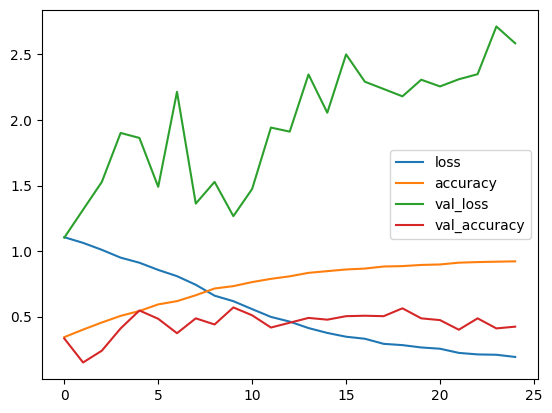

In [46]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25


model_exper_2nd=keras.models.Sequential()
model_exper_2nd.add(keras.layers.experimental.preprocessing.RandomFlip("vertical"))
model_exper_2nd.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model_exper_2nd.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_exper_2nd.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model_exper_2nd.add(keras.layers.MaxPool2D(2,2))
model_exper_2nd.add(keras.layers.Dropout(0.2))
model_exper_2nd.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_exper_2nd.add(keras.layers.MaxPooling2D((2,2)))
model_exper_2nd.add(keras.layers.Dropout(0.2))
model_exper_2nd.add(keras.layers.Flatten())
model_exper_2nd.add(keras.layers.Dense(n_dense, activation='relu'))
model_exper_2nd.add(keras.layers.Dense(3, activation='softmax'))


model_exper_2nd.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_2nd = model_exper_2nd.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))

model_exper_2nd.summary()
print()

# 모델 시험
test_loss, test_accuracy = model_exper_2nd.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

print('''


''')
plt.figure()

for k,v in history_2nd.history.items():
    plt.plot(history_2nd.history[k], label=k)
plt.legend()
plt.show()

### 소결론 2
1. dropout레이어 추가 후 오히려 더 나빠졌다. 
2. dropout레이어 추가 대신 convolution layer의 filter크기를 조절해본다. 

Epoch 1/25
231/231 [==============================] - 6s 19ms/step - loss: 1.0743 - accuracy: 0.3850 - val_loss: 1.0733 - val_accuracy: 0.3933
Epoch 2/25
231/231 [==============================] - 4s 18ms/step - loss: 0.9775 - accuracy: 0.4844 - val_loss: 1.2383 - val_accuracy: 0.4500
Epoch 3/25
231/231 [==============================] - 4s 16ms/step - loss: 0.8509 - accuracy: 0.5929 - val_loss: 1.6030 - val_accuracy: 0.3900
Epoch 4/25
231/231 [==============================] - 4s 17ms/step - loss: 0.6858 - accuracy: 0.7032 - val_loss: 1.8712 - val_accuracy: 0.4833
Epoch 5/25
231/231 [==============================] - 4s 17ms/step - loss: 0.5474 - accuracy: 0.7786 - val_loss: 2.4972 - val_accuracy: 0.4167
Epoch 6/25
231/231 [==============================] - 4s 18ms/step - loss: 0.4227 - accuracy: 0.8375 - val_loss: 3.0625 - val_accuracy: 0.5167
Epoch 7/25
231/231 [==============================] - 4s 17ms/step - loss: 0.3448 - accuracy: 0.8648 - val_loss: 2.5322 - val_accuracy: 0.5367

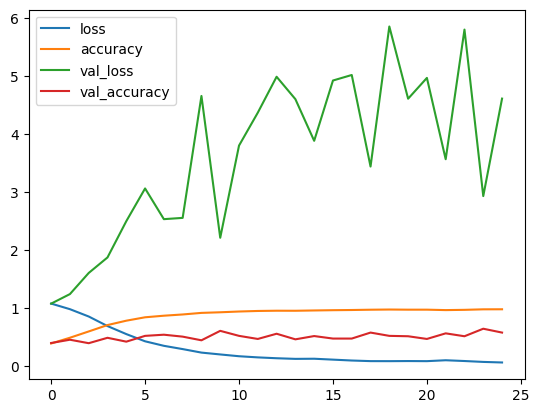

In [52]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25


model_exper_3rd = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.Conv2D(n_channel_1, (6,6), activation='relu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(n_channel_2, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_dense, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_exper_3rd.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_3rd = model_exper_3rd.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))
print()
model_exper_3rd.summary()
print()

# 모델 시험
test_loss, test_accuracy = model_exper_3rd.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

print('''


''')
plt.figure()

for k,v in history_3rd.history.items():
    plt.plot(history_3rd.history[k], label=k)
plt.legend()
plt.show()

### 소결론4
1. 여전히 validation data의 loss값은 상승하고 있다. 
2. accuracy는 유지되는데 loss값이 상승하는 것은 특정 모양에 overfitting한다는 것을 의미한다. 
3. 다른 방법을 사용한다. 그래프 그리기 전 테스트에서 가장 성적이 좋았던 히든층의 활성화 함수를 gelu로 바꿔본다. 

Epoch 1/25
231/231 [==============================] - 7s 22ms/step - loss: 0.9976 - accuracy: 0.4881 - val_loss: 0.8659 - val_accuracy: 0.4767
Epoch 2/25
231/231 [==============================] - 4s 19ms/step - loss: 0.6950 - accuracy: 0.6960 - val_loss: 0.5963 - val_accuracy: 0.7133
Epoch 3/25
231/231 [==============================] - 4s 19ms/step - loss: 0.4987 - accuracy: 0.8021 - val_loss: 0.4061 - val_accuracy: 0.8067
Epoch 4/25
231/231 [==============================] - 4s 18ms/step - loss: 0.3204 - accuracy: 0.8710 - val_loss: 0.5816 - val_accuracy: 0.7533
Epoch 5/25
231/231 [==============================] - 4s 19ms/step - loss: 0.2129 - accuracy: 0.9193 - val_loss: 0.5750 - val_accuracy: 0.7833
Epoch 6/25
231/231 [==============================] - 4s 19ms/step - loss: 0.1442 - accuracy: 0.9426 - val_loss: 1.0710 - val_accuracy: 0.7033
Epoch 7/25
231/231 [==============================] - 5s 20ms/step - loss: 0.1296 - accuracy: 0.9491 - val_loss: 1.2408 - val_accuracy: 0.7400

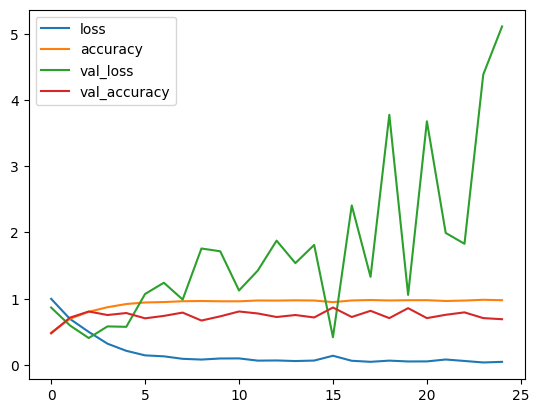

In [54]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25


model_exper_4th = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_dense, activation='gelu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_exper_4th.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_4th = model_exper_4th.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))
print()
model_exper_4th.summary()
print()

# 모델 시험
test_loss, test_accuracy = model_exper_4th.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

print('''


''')
plt.figure()

for k,v in history_4th.history.items():
    plt.plot(history_4th.history[k], label=k)
plt.legend()
plt.show()

예측확률분포: [9.9955267e-01 4.4157609e-04 5.7593443e-06]
라벨: 1, 예측결과: 0


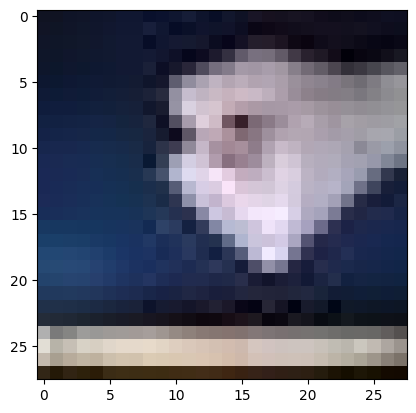

예측확률분포: [0.44569767 0.00246471 0.5518377 ]
라벨: 1, 예측결과: 2


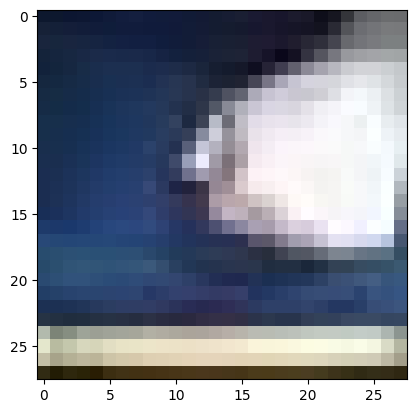

예측확률분포: [9.9999964e-01 2.2242874e-18 4.1525720e-07]
라벨: 2, 예측결과: 0


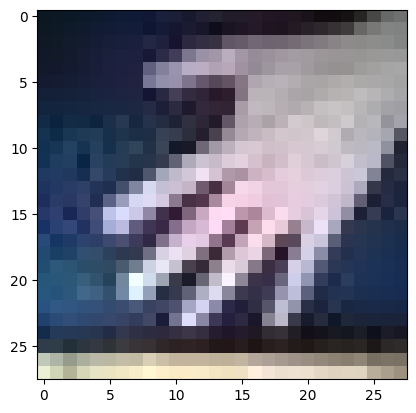

예측확률분포: [6.5656826e-07 1.5324926e-09 9.9999928e-01]
라벨: 1, 예측결과: 2


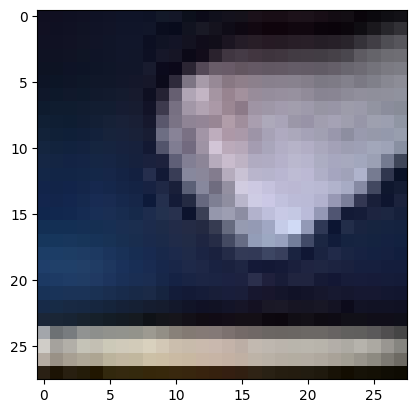

예측확률분포: [1.0610563e-14 1.5691343e-01 8.4308660e-01]
라벨: 1, 예측결과: 2


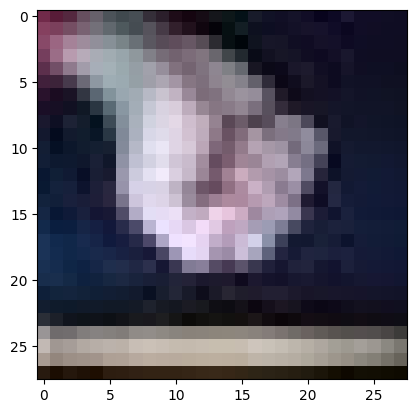

예측확률분포: [0.59946734 0.00361904 0.39691356]
라벨: 1, 예측결과: 0


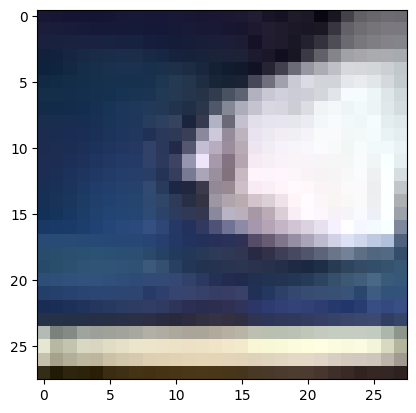

예측확률분포: [9.1465086e-01 8.3906390e-04 8.4510133e-02]
라벨: 1, 예측결과: 0


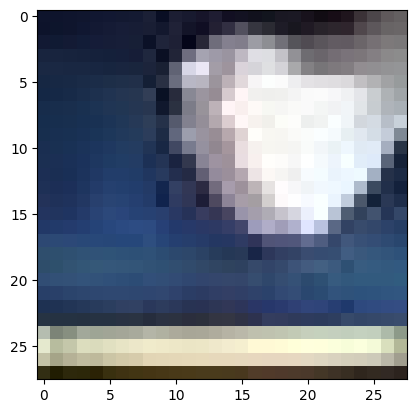

예측확률분포: [9.9959594e-01 2.5717867e-27 4.0410843e-04]
라벨: 2, 예측결과: 0


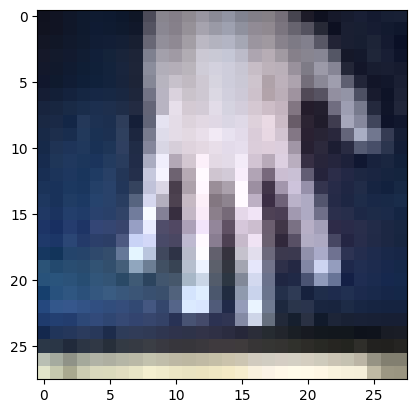

예측확률분포: [8.3138474e-10 4.3272472e-11 1.0000000e+00]
라벨: 1, 예측결과: 2


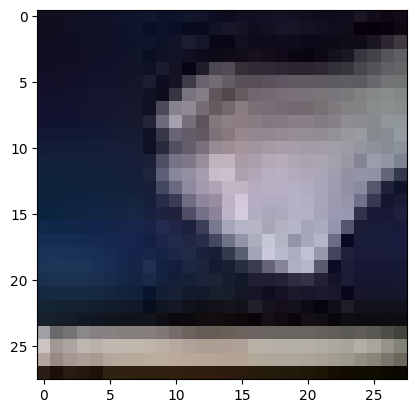

예측확률분포: [1.02676043e-16 1.02762951e-10 1.00000000e+00]
라벨: 1, 예측결과: 2


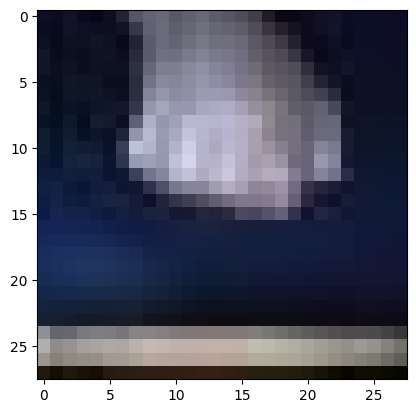

예측확률분포: [5.9548873e-11 1.0569341e-11 1.0000000e+00]
라벨: 1, 예측결과: 2


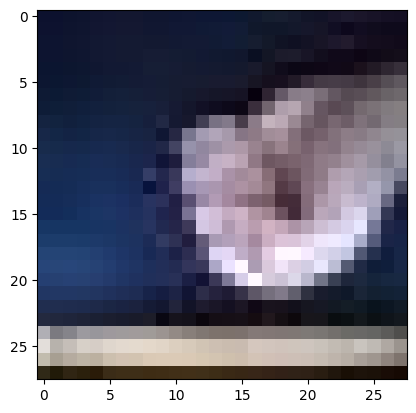

예측확률분포: [9.9999988e-01 2.2545514e-13 1.2219037e-07]
라벨: 2, 예측결과: 0


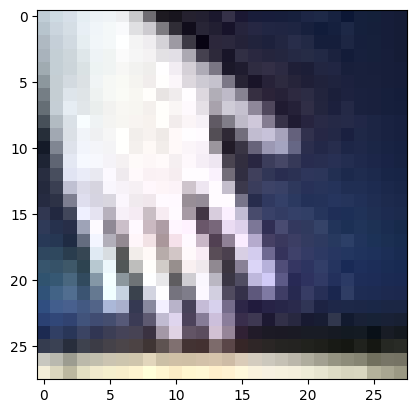

예측확률분포: [1.02676043e-16 1.02762951e-10 1.00000000e+00]
라벨: 1, 예측결과: 2


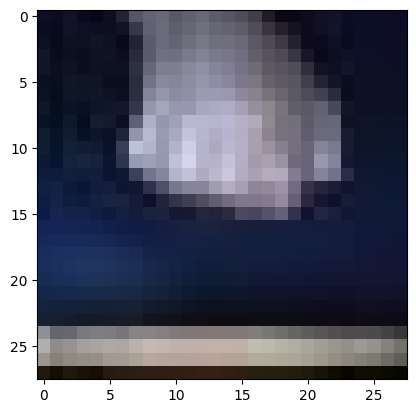

예측확률분포: [6.0048835e-13 1.4390354e-03 9.9856097e-01]
라벨: 1, 예측결과: 2


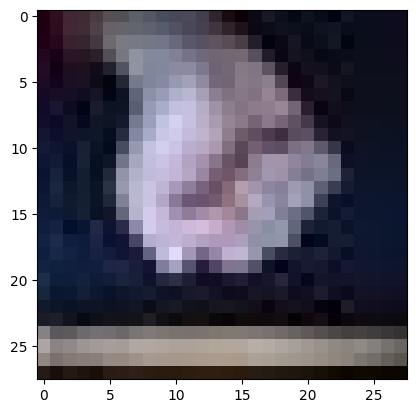

예측확률분포: [1.4955099e-12 2.2558975e-01 7.7441019e-01]
라벨: 1, 예측결과: 2


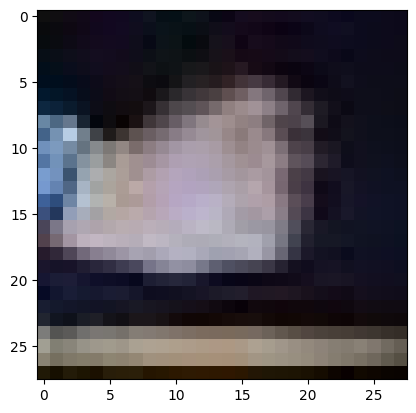

예측확률분포: [8.0078436e-15 3.9133186e-11 1.0000000e+00]
라벨: 1, 예측결과: 2


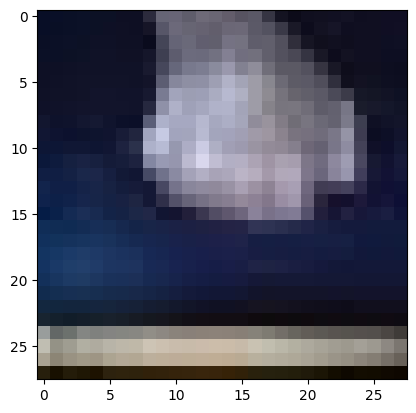

예측확률분포: [6.0048835e-13 1.4390354e-03 9.9856097e-01]
라벨: 1, 예측결과: 2


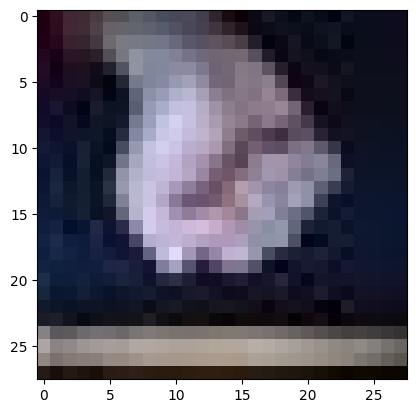

예측확률분포: [4.3496207e-13 2.2418087e-03 9.9775821e-01]
라벨: 1, 예측결과: 2


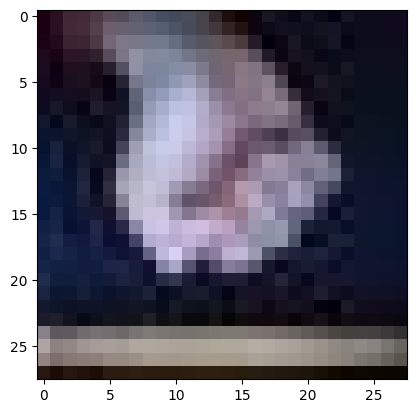

예측확률분포: [2.718107e-14 9.923481e-13 1.000000e+00]
라벨: 1, 예측결과: 2


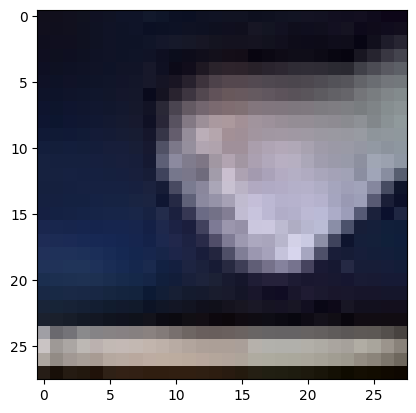

예측확률분포: [1.9646545e-14 5.5325070e-13 1.0000000e+00]
라벨: 1, 예측결과: 2


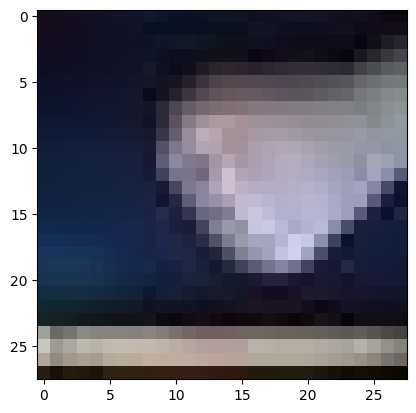

In [56]:
predicted_result = model_exper_4th.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=20)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 소결론5
1. 여전히 overfitting문제가 해결되지 않는다. 
2. 특히 주먹에 대한 예측률이 매우 떨어지는 것 같다. 
3. dropout layer를 다시 넣어서 테스트 해본다. 

Epoch 1/25
231/231 [==============================] - 9s 28ms/step - loss: 1.0863 - accuracy: 0.3962 - val_loss: 0.9719 - val_accuracy: 0.6633
Epoch 2/25
231/231 [==============================] - 6s 25ms/step - loss: 0.9953 - accuracy: 0.4839 - val_loss: 0.6844 - val_accuracy: 0.5467
Epoch 3/25
231/231 [==============================] - 6s 27ms/step - loss: 0.9153 - accuracy: 0.5636 - val_loss: 0.2502 - val_accuracy: 0.9300
Epoch 4/25
231/231 [==============================] - 6s 25ms/step - loss: 0.8158 - accuracy: 0.6340 - val_loss: 0.4058 - val_accuracy: 0.8433
Epoch 5/25
231/231 [==============================] - 6s 25ms/step - loss: 0.7533 - accuracy: 0.6610 - val_loss: 0.4502 - val_accuracy: 0.8267
Epoch 6/25
231/231 [==============================] - 5s 24ms/step - loss: 0.6954 - accuracy: 0.6957 - val_loss: 0.1817 - val_accuracy: 0.9433
Epoch 7/25
231/231 [==============================] - 5s 24ms/step - loss: 0.6523 - accuracy: 0.7188 - val_loss: 0.1280 - val_accuracy: 0.9467

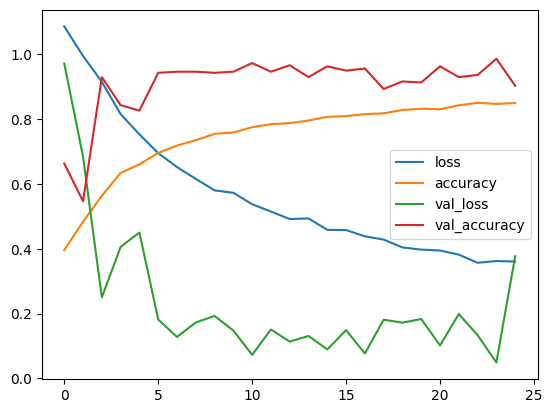

In [59]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=196
n_channel_2=392
n_dense=196
n_train_epoch=25


model_exper_4th = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(factor = 0.5),
    tf.keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(n_channel_2, (3,3), activation='gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_dense, activation='gelu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_exper_4th.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_4th = model_exper_4th.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))
print()
model_exper_4th.summary()
print()

# 모델 시험
test_loss, test_accuracy = model_exper_4th.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

print('''


''')
plt.figure()

for k,v in history_4th.history.items():
    plt.plot(history_4th.history[k], label=k)
plt.legend()
plt.show()

예측확률분포: [0.5697434  0.00420211 0.42605448]
라벨: 1, 예측결과: 0


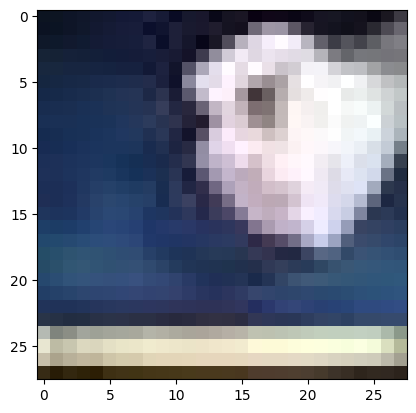

예측확률분포: [7.3491204e-01 2.6474839e-01 3.3953576e-04]
라벨: 1, 예측결과: 0


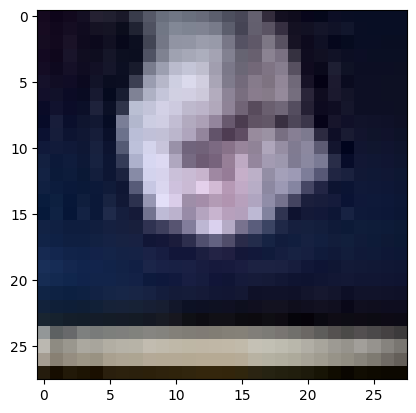

예측확률분포: [0.98825943 0.00109473 0.01064586]
라벨: 1, 예측결과: 0


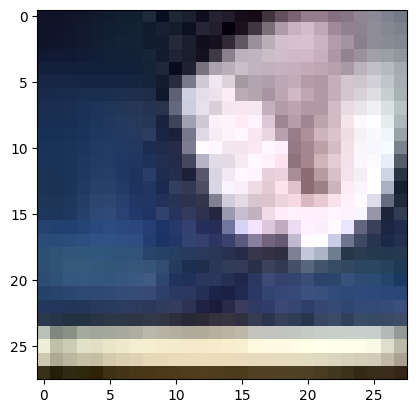

예측확률분포: [0.14725186 0.42167118 0.43107697]
라벨: 1, 예측결과: 2


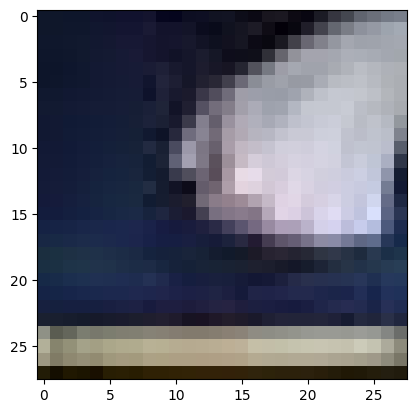

예측확률분포: [0.34023485 0.20194048 0.45782468]
라벨: 1, 예측결과: 2


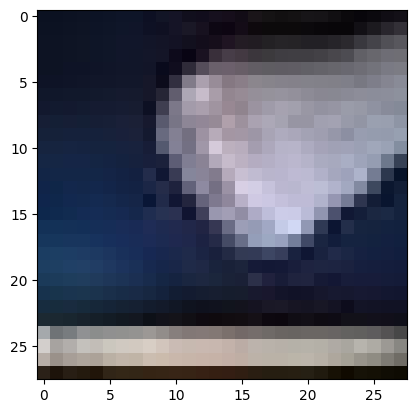

예측확률분포: [0.00968624 0.00881672 0.98149705]
라벨: 1, 예측결과: 2


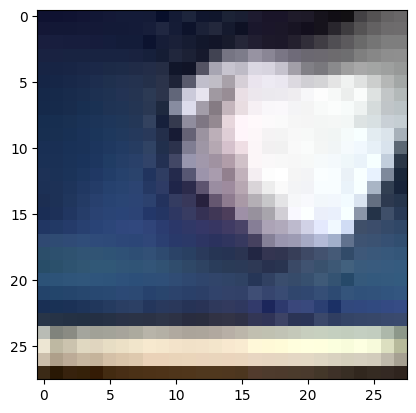

예측확률분포: [0.98825943 0.00109473 0.01064586]
라벨: 1, 예측결과: 0


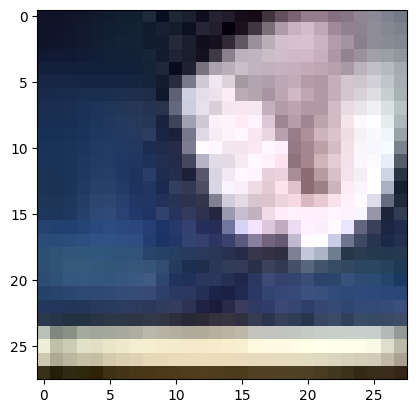

예측확률분포: [0.9908501  0.00119697 0.00795292]
라벨: 1, 예측결과: 0


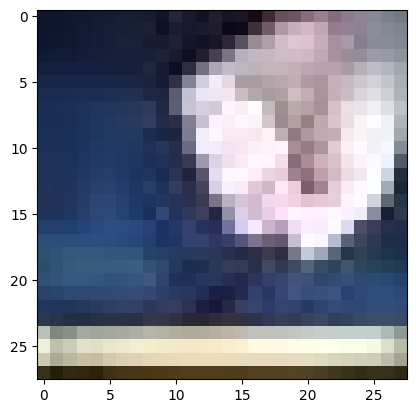

예측확률분포: [0.41557917 0.14536892 0.4390519 ]
라벨: 1, 예측결과: 2


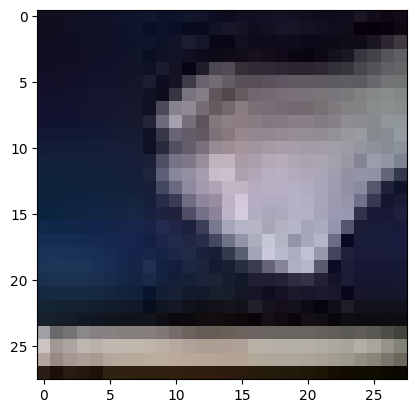

예측확률분포: [0.41444293 0.09465952 0.4908975 ]
라벨: 1, 예측결과: 2


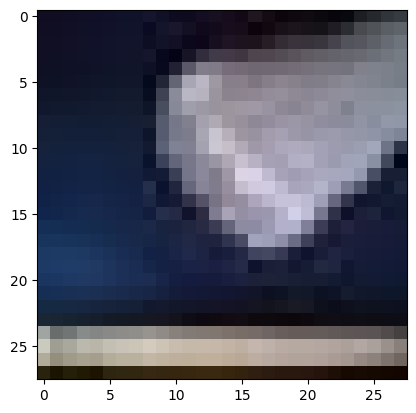

예측확률분포: [9.9128026e-01 8.3946367e-04 7.8803170e-03]
라벨: 1, 예측결과: 0


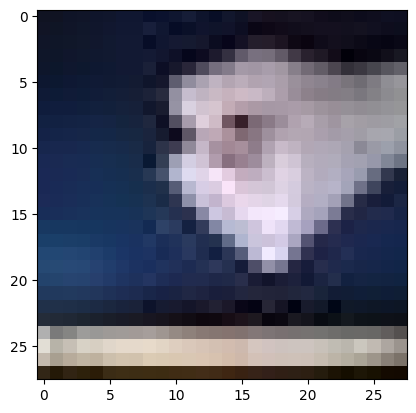

예측확률분포: [0.1196796  0.17970988 0.7006105 ]
라벨: 1, 예측결과: 2


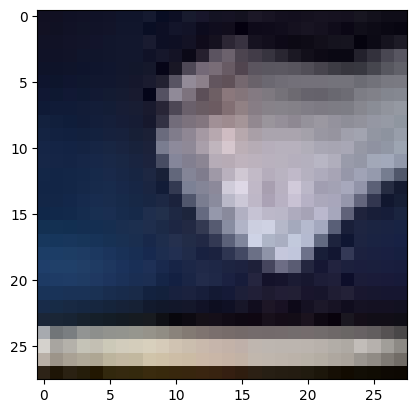

예측확률분포: [0.14725186 0.42167118 0.43107697]
라벨: 1, 예측결과: 2


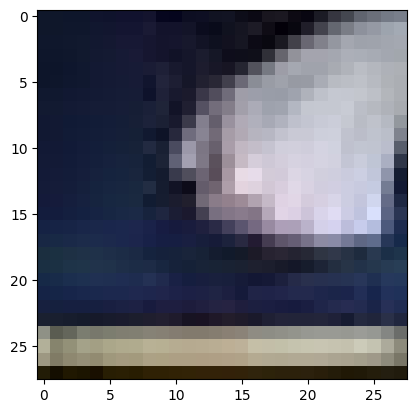

예측확률분포: [0.1196796  0.17970988 0.7006105 ]
라벨: 1, 예측결과: 2


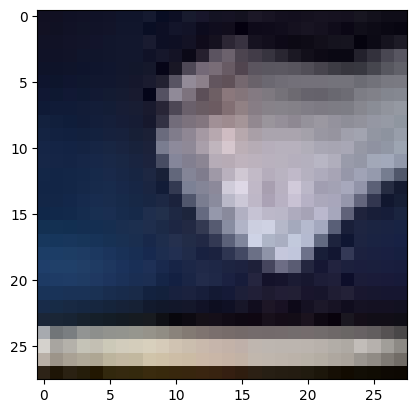

예측확률분포: [0.10721835 0.00810344 0.8846782 ]
라벨: 1, 예측결과: 2


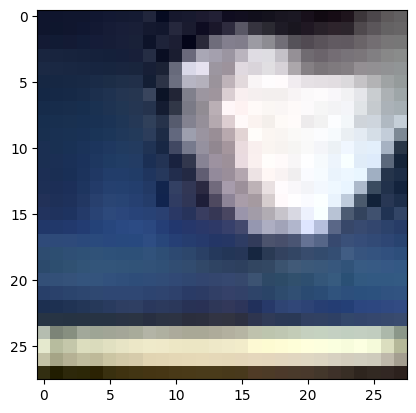

예측확률분포: [0.1649312  0.20572057 0.6293483 ]
라벨: 1, 예측결과: 2


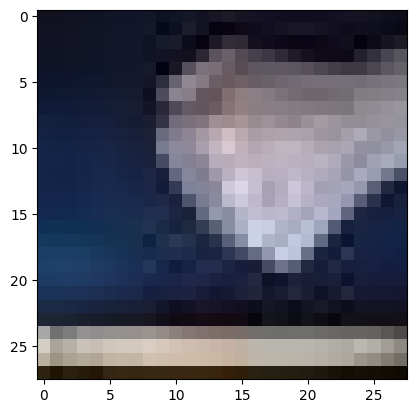

예측확률분포: [0.10721835 0.00810344 0.8846782 ]
라벨: 1, 예측결과: 2


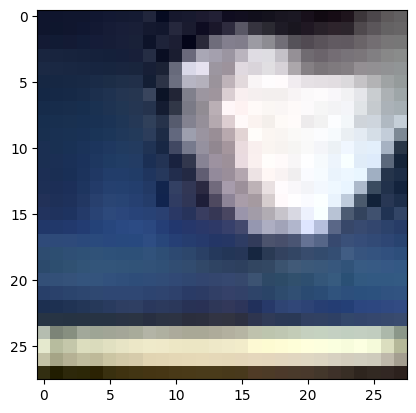

예측확률분포: [0.58565426 0.00257452 0.41177127]
라벨: 1, 예측결과: 0


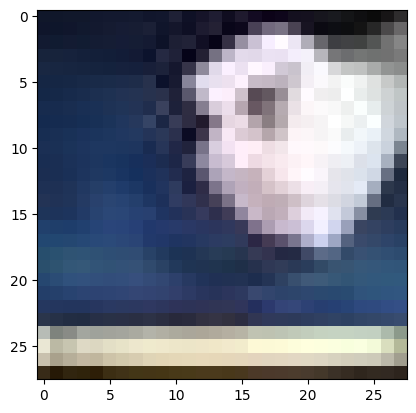

예측확률분포: [0.9153839  0.0808091  0.00380711]
라벨: 1, 예측결과: 0


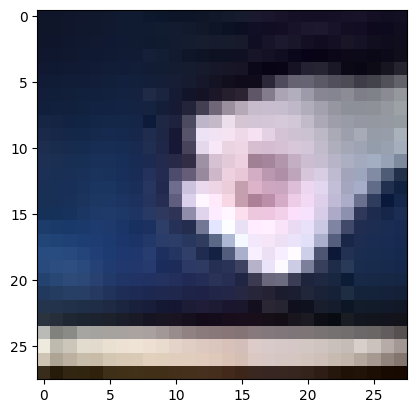

예측확률분포: [0.8671249  0.02034972 0.11252543]
라벨: 1, 예측결과: 0


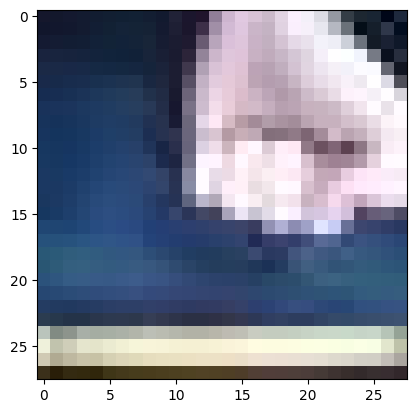

In [60]:
predicted_result = model_exper_4th.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=20)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 소결론6
1. 어마어마한 결과가 나왔다. 
2. 데이터 어그멘테이션 레이어를 1층(randomrotation) 더 늘렸는데 validation accuracy와 loss가 매우 작게 유지되었다. 
3. 주먹만 틀리고 있는 걸 봐서 overfitting문제가 해결되지 않고 있는 것 같다. 
4. 상당히 고민해볼 문제인것 같다. 

# 회고
----
### 신경쓴점
1. 최대한 여러 하이퍼 파라미터를 조정해서 좋은 성적을 얻으려 노력했다. 
2. 최대한 많은 그루의 데이터를 모아서 최대한 많은 데이터를 가지고 훈련 할 수 있도록 하고자 했다. 
3. 데이터 어그멘테이션에 신경을 썼다. 
4. 평가를 위한 시각화를 진행했다. 

### 아쉬운점
1. 하주완 그루님이 시도한 하이퍼 파라미터 최적화를 시도해보고자 했으나 시간부족으로 하지 못했다. 
2. 다른사람의 코드를 너무 참고 한 것 같다. 
3. overfitting문제를 해결하지 못한 것 같다. 

### 시도해보고 싶은점
1. 하이퍼 파라미터 최적화를 시도해 보고 싶다. 

# 레퍼런스

1. https://medium.com/geekculture/rock-paper-scissors-image-classification-using-cnn-eefe4569b415
2. https://www.tensorflow.org/api_docs/python/tf/keras/activations
3. https://www.tensorflow.org/guide/keras/preprocessing_layers
4. LMS
5. 곽상혁님이 모은 그루님들의 데이터 모음집
6. 이승용님의 깃허브 https://github.com/seuyon0101/aiffel/blob/master/%5BE-05%5D%20%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb
7. 하주완님의 깃허브 https://github.com/methius/aiffel/blob/main/%5BE-05%5Drock_scissors_paper_classification.ipynb